## PCA, by pandas, using MVDA_exploration_tool
#### Plot the raw data, build a PCA model, and plot the results

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
import numpy as np
import MVDA_exploration_tools as mv
import matplotlib.pyplot as plt
import sklearn
##%matplotlib widget

In [3]:
print('Python version', sys.version)
print('sklearn.__version__', sklearn.__version__)
print('pandas.__version__', pd.__version__)
print('MVDA_exploration_tools.__version__', mv.__version__)

Python version 3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]
sklearn.__version__ 1.2.2
pandas.__version__ 2.0.1
MVDA_exploration_tools.__version__ 0.1.6


In [4]:
dataFrame = pd.read_excel('decimated_spectra.xlsx')
display(dataFrame)

,Unnamed: 0,sample,250,278,306,334,362,390,418,Fel,Met
0,0,fm01,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058,0.01972,0.19112
1,1,fm02,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797,0.02465,0.19112
2,2,fm03,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096,0.02958,0.19112
3,3,fm04,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829,0.01972,0.23890
4,4,fm05,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061,0.02465,0.23890
5,5,fm06,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904,0.02958,0.23890
6,6,fm07,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329,0.02958,0.23890
7,7,fm08,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001,0.01972,0.28668
8,8,fm09,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334,0.02465,0.28668
9,9,fm10,0.720811,0.824102,0.035586,0.163817,0.333757,0.177520,0.014077,0.02958,0.28668


### Define the primary ID (index) of the table as the column named sample

In [5]:
named_Obs_dataFrame = dataFrame.set_index('sample')
named_Obs_dataFrame

,Unnamed: 0,250,278,306,334,362,390,418,Fel,Met
sample,,,,,,,,,,
fm01,0,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058,0.01972,0.19112
fm02,1,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797,0.02465,0.19112
fm03,2,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096,0.02958,0.19112
fm04,3,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829,0.01972,0.23890
fm05,4,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061,0.02465,0.23890
fm06,5,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904,0.02958,0.23890
fm07,6,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329,0.02958,0.23890
fm08,7,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001,0.01972,0.28668
fm09,8,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334,0.02465,0.28668


### Get the selection of the data table designated as X-data

In [6]:
data = named_Obs_dataFrame.loc['fm01':'fm10' , '250':'418']
data

,250,278,306,334,362,390,418
sample,,,,,,,
fm01,0.455452,0.536366,0.013826,0.099335,0.211982,0.111913,0.008058
fm02,0.564452,0.554564,0.020845,0.129672,0.271033,0.143549,0.009797
fm03,0.692226,0.596313,0.051761,0.181787,0.351545,0.199277,0.038096
fm04,0.483403,0.671500,0.014822,0.100429,0.213960,0.111585,0.005829
fm05,0.599889,0.699944,0.037068,0.143525,0.284059,0.156597,0.023061
fm06,0.703718,0.713386,0.044752,0.175482,0.346520,0.193078,0.029904
fm07,0.696338,0.700592,0.029916,0.159379,0.328703,0.174273,0.010329
fm08,0.514464,0.793404,0.020093,0.105247,0.219955,0.116894,0.009001
fm09,0.611695,0.805055,0.020922,0.127295,0.269475,0.139565,0.004334


In [7]:
test_set = named_Obs_dataFrame.loc['fm11':'fm12' , '250':'418']
test_set 

,250,278,306,334,362,390,418
sample,,,,,,,
fm11,0.529496,0.074750,0.028027,0.131487,0.270114,0.141439,0.009292
fm12,0.133005,0.752452,0.008606,0.001916,0.002508,0.002149,0.012900


### Plot the X-data using the pandas plotting tools

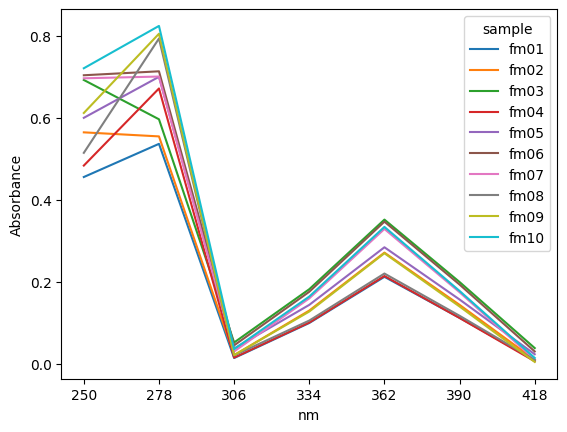

In [8]:
raw_plt_axes = data.transpose().plot()
raw_plt_axes.set_xlabel('nm')
_ = raw_plt_axes.set_ylabel('Absorbance')

### Define settings for the PCA model, and give it the name M1

In [9]:
M1 = mv.PCA_model(n_components=3, is_center=True)

### Enter the data table and run the calculations for the PCA model

In [11]:
M1.fit(data)

### Check the output of the PCA loadings (P)

In [12]:
M1.P

,250,278,306,334,362,390,418
p1,-0.721213,-0.499315,-0.073902,-0.202351,-0.370905,-0.212131,-0.039475
p2,-0.321281,0.854362,-0.069028,-0.174788,-0.298293,-0.192626,-0.073782
p3,0.414093,-0.117952,-0.478136,-0.314400,-0.114836,-0.352958,-0.591089


<Axes: >

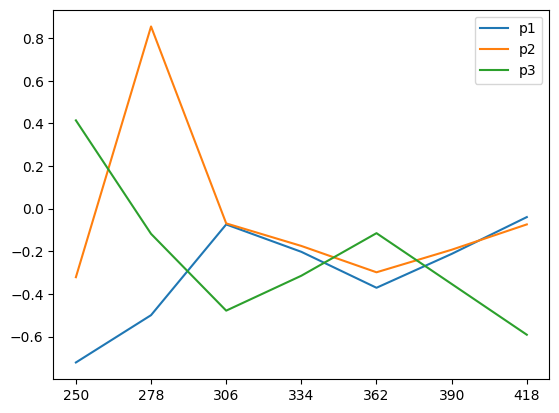

In [15]:
M1.P.transpose().plot()

### Check the output of the PCA scores (T)

In [13]:
M1.T

,t1,t2,t3
sample,,,
fm01,0.228103,-0.045592,0.002747
fm02,0.105065,-0.094688,0.013867
fm03,-0.063565,-0.148152,-0.014956
fm04,0.139599,0.060259,-0.001232
fm05,-0.005208,0.007216,-0.014660
fm06,-0.125013,-0.046938,-0.011066
fm07,-0.097577,-0.041278,0.019798
fm08,0.051490,0.150179,-0.011221
fm09,-0.051967,0.106190,0.009409


<Axes: xlabel='t1', ylabel='t2'>

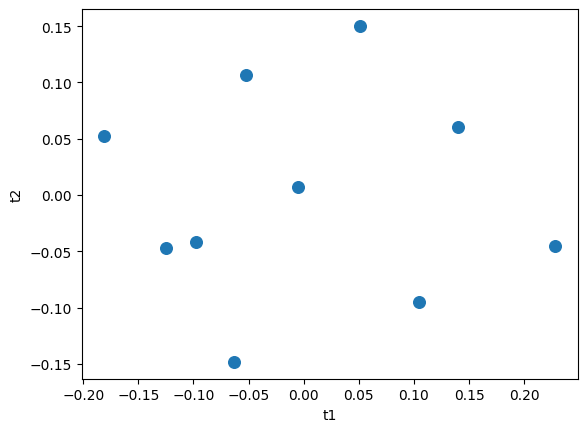

In [17]:
M1.T.plot.scatter(x='t1', y='t2', s=70)

### Check the cumulative proportions of X-data variation modelled by the 3 components 

In [18]:
M1.R2X

,R2X
1,0.655835
2,0.993694
3,0.999919


<Axes: >

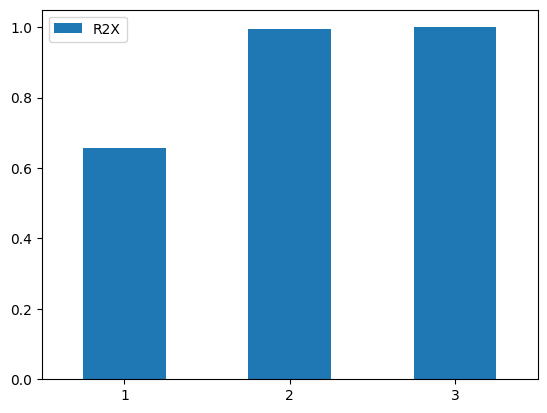

In [19]:
M1.R2X.plot.bar(rot=0)

### Make a new PCA model with only 2 components and check the spectral residuals

In [27]:
M2 = mv.PCA_model(n_components=2, is_center=True)
M2.fit(data)

Text(0, 0.5, 'Absorbance')

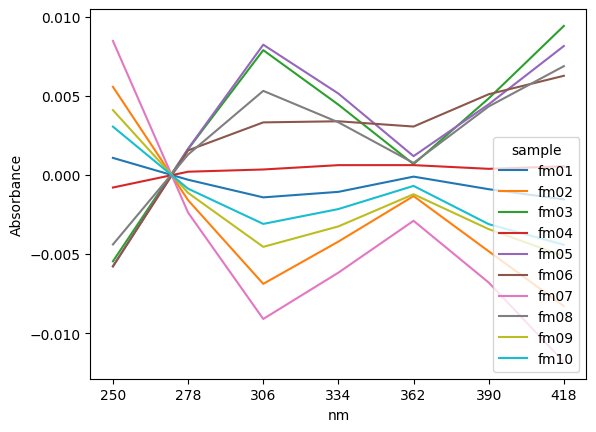

In [28]:
resid_axes = M2.Epred(data).transpose().plot()
resid_axes.set_xlabel('nm')
resid_axes.set_ylabel('Absorbance')

### Also check the DModX residuals per spectrum in th training set

<Axes: xlabel='sample'>

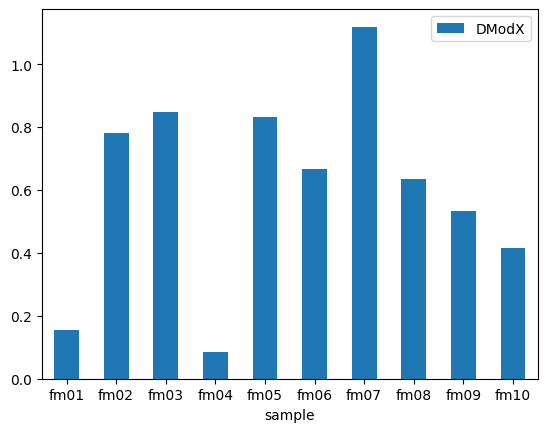

In [30]:
M2.DModXpred(data).plot.bar(rot=0)

### Then make a PCA prediction for the selected test set data 
It is somewhat outside the desingn space of the training set and should thus have larger values than from the training set

In [34]:
M2.DModXpred(test_set)

,DModX
sample,
fm11,3.651708
fm12,3.712513


Text(0, 0.5, 'DModX')

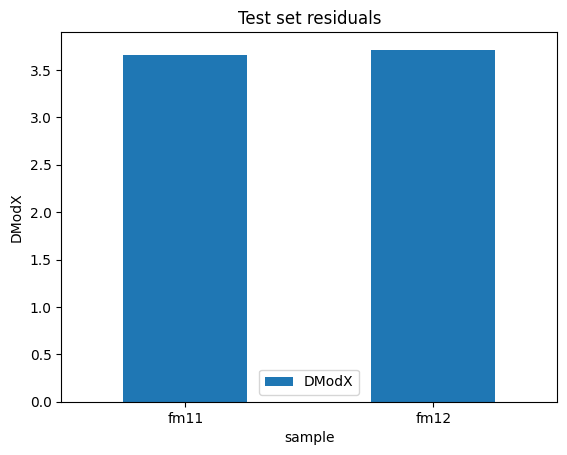

In [39]:
handle = M2.DModXpred(test_set).plot.bar(rot=0)
handle.set_title('Test set residuals')
handle.set_ylabel('DModX')

### Get the average spectrum of the training set

<Axes: >

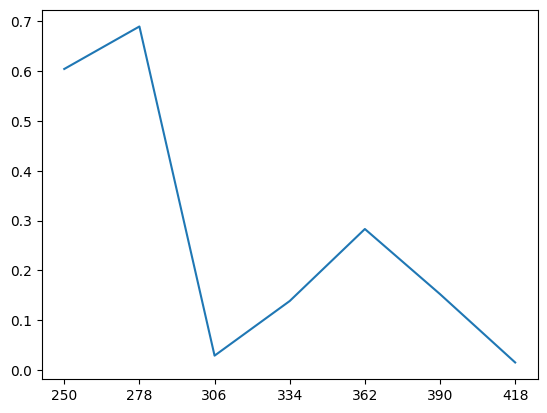

In [40]:
M2.Xavg.plot()

### Pandas plotting, further info
https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html <br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html